In [63]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import numpy as np
import xgboost as xgb
from joblib import dump
from src.models import eval_model as evm
from src.models import eval_baseline as evb
from sklearn.utils import resample
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score , cross_validate 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
x_train = np.load('../data/processed/sp_w2_x_train.npy')
y_train  = np.load('../data/processed/sp_w2_y_train.npy' )

x_val = np.load('../data/processed/sp_w2_x_val.npy')
y_val  = np.load('../data/processed/sp_w2_y_val.npy' )

x_test = np.load('../data/processed/sp_w2_x_test.npy')
y_test = np.load('../data/processed/sp_w2_y_test.npy' )

x = np.load('../data/processed/sp_w2_x.npy')
y = np.load('../data/processed/sp_w2_y.npy' )


x_col_name = np.load('../data/processed/sp_w2_x_col_name.npy')
y_col_name = np.load('../data/processed/sp_w2_y_col_name.npy' )

In [4]:
np.unique(y_train,return_counts=True)

(array([0, 1], dtype=int64), array([4268,  852], dtype=int64))

Accuracy Score:  0.83359375  F1 Score  0.0  Precision Score  0.0  Recall Score  0.0 (BASELINE)


c:\users\xauspi\.virtualenvs\kaggle_assignment-dq2gjalz\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


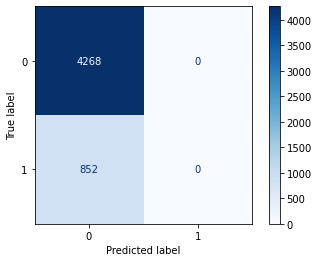

In [5]:
evb.eval_baseline(x_train,y_train)

In [12]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

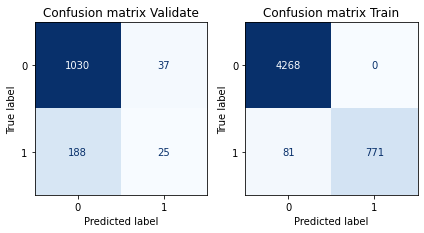

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=8,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', use_label_encoder=False,
               validate_parameters=1, verbosity=0),
 0.9998008984868285,
 0.653149763938206)

In [28]:
evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False),x_train,y_train,x_val,y_val)

#### Out of the box much better performance than Random Forest

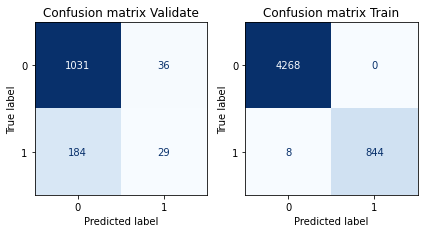

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=8,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', use_label_encoder=False,
               validate_parameters=1, verbosity=0),
 0.9999983499874598,
 0.6429108861227346)

In [30]:
evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False, n_estimators=150 ),x_train,y_train,x_val,y_val)

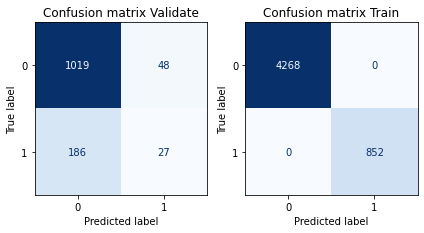

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=8,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', use_label_encoder=False,
               validate_parameters=1, verbosity=0),
 1.0,
 0.6274315684799204)

In [31]:
evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False, n_estimators=500 ),x_train,y_train,x_val,y_val)

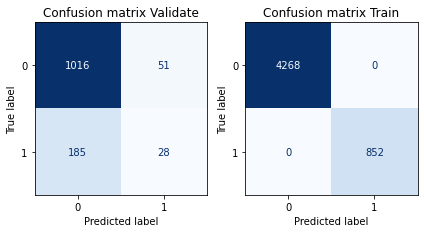

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=350, n_jobs=8, num_parallel_tree=1, random_state=8,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', use_label_encoder=False,
               validate_parameters=1, verbosity=0),
 1.0,
 0.632042803525307)

In [32]:
evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False, n_estimators=350 ),x_train,y_train,x_val,y_val)

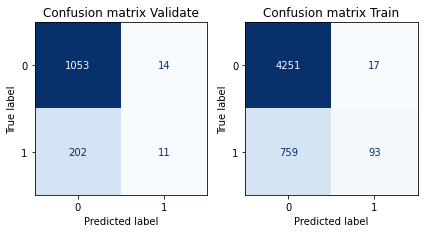

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=2,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=8,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', use_label_encoder=False,
               validate_parameters=1, verbosity=0),
 0.8311588918075778,
 0.674049922779413)

In [33]:
evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False, n_estimators=150, max_depth = 2 ),x_train,y_train,x_val,y_val)

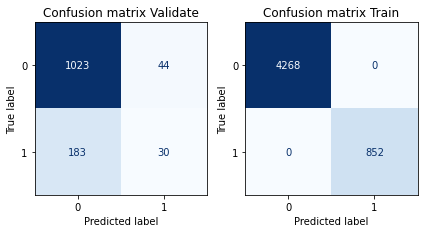

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=12,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=8,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', use_label_encoder=False,
               validate_parameters=1, verbosity=0),
 1.0,
 0.6284215760039775)

In [34]:
evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False, n_estimators=150, max_depth = 12 ),x_train,y_train,x_val,y_val)

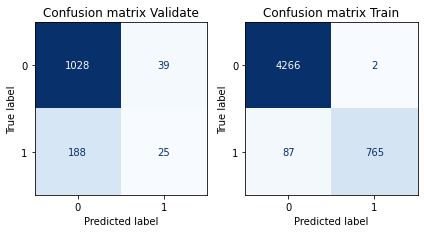

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=5,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=8,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', use_label_encoder=False,
               validate_parameters=1, verbosity=0),
 0.9996111470447175,
 0.6408340703389346)

In [35]:
evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False, n_estimators=150, max_depth = 5 ),x_train,y_train,x_val,y_val)

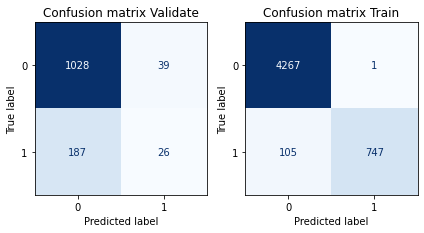

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=5, missing=nan, monotone_constraints='()',
               n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=8,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', use_label_encoder=False,
               validate_parameters=1, verbosity=0),
 0.9992228440936151,
 0.635699231314158)

In [36]:
evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False, n_estimators=150, min_child_weight  = 5 ),x_train,y_train,x_val,y_val)

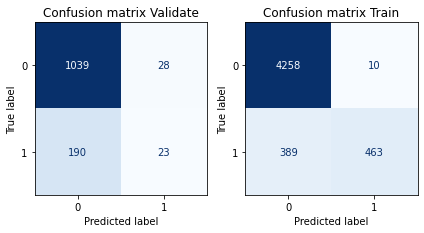

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=15, missing=nan, monotone_constraints='()',
               n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=8,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', use_label_encoder=False,
               validate_parameters=1, verbosity=0),
 0.9814049086773059,
 0.634643223288497)

In [37]:
evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False, n_estimators=150, min_child_weight  = 15 ),x_train,y_train,x_val,y_val)

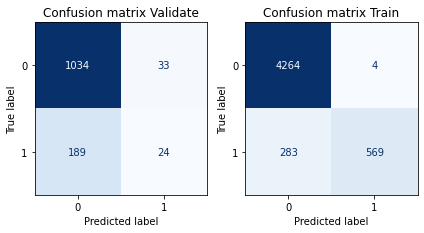

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=5, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=8,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', use_label_encoder=False,
               validate_parameters=1, verbosity=0),
 0.9927415948361207,
 0.6425808836147154)

In [38]:
evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False,  min_child_weight  = 5 ),x_train,y_train,x_val,y_val)

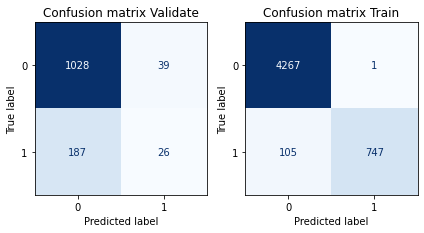

(XGBClassifier(Colsample_bytree=0.5, base_score=0.5, booster='gbtree',
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.300000012,
               max_delta_step=0, max_depth=6, min_child_weight=5, missing=nan,
               monotone_constraints='()', n_estimators=150, n_jobs=8,
               num_parallel_tree=1, random_state=8, reg_alpha=0, reg_lambda=1,
               scale_pos_weight=1, subsample=1, tree_method='exact',
               use_label_encoder=False, validate_parameters=1, verbosity=0),
 0.9992228440936151,
 0.635699231314158)

In [39]:
evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False, n_estimators=150, min_child_weight  = 5 , Colsample_bytree = 0.5),x_train,y_train,x_val,y_val)

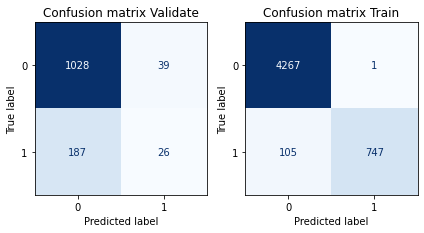

(XGBClassifier(Colsample_bytree=0.8, base_score=0.5, booster='gbtree',
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.300000012,
               max_delta_step=0, max_depth=6, min_child_weight=5, missing=nan,
               monotone_constraints='()', n_estimators=150, n_jobs=8,
               num_parallel_tree=1, random_state=8, reg_alpha=0, reg_lambda=1,
               scale_pos_weight=1, subsample=1, tree_method='exact',
               use_label_encoder=False, validate_parameters=1, verbosity=0),
 0.9992228440936151,
 0.635699231314158)

In [40]:
evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False, n_estimators=150, min_child_weight  = 5 , Colsample_bytree = 0.8),x_train,y_train,x_val,y_val)

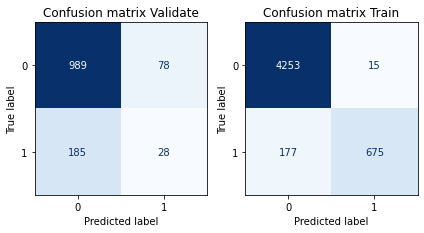

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=5, missing=nan, monotone_constraints='()',
               n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=8,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
               tree_method='exact', use_label_encoder=False,
               validate_parameters=1, verbosity=0),
 0.992867270791258,
 0.6116398484628484)

In [41]:
evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False, n_estimators=150, min_child_weight  = 5 , subsample  = 0.5),x_train,y_train,x_val,y_val)

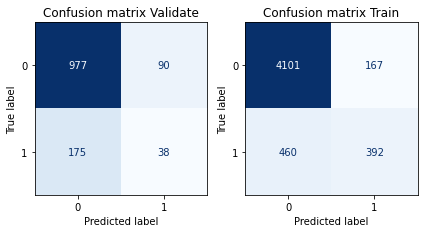

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=5, missing=nan, monotone_constraints='()',
               n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=8,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.2,
               tree_method='exact', use_label_encoder=False,
               validate_parameters=1, verbosity=0),
 0.8836057779039121,
 0.6405040678309155)

In [43]:
evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False, n_estimators=150, min_child_weight  = 5 , subsample  = 0.2),x_train,y_train,x_val,y_val)

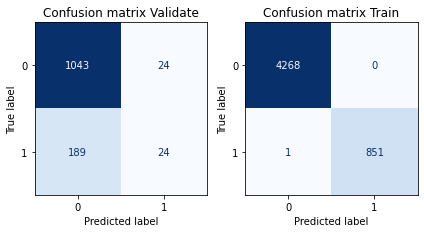

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=8,
               reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', use_label_encoder=False,
               validate_parameters=1, verbosity=0),
 1.0,
 0.6457423076415381)

In [44]:
evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False, n_estimators=150, reg_alpha  = 1 ),x_train,y_train,x_val,y_val)

In [68]:
space = {
    'max_depth': hp.choice('max_depth',range(3,200,1)),
    'max_features': hp.choice('max_features',range(1,15,1)),
    'min_samples_leaf': hp.choice('min_samples_leaf',range(1,14,1)),
    'n_estimators':  hp.choice('n_estimators',range(50,500,1)),
    'learning_rate': hp.quniform('learning_rate',0.01,1.00,0.01),
    'min_child_weight' : hp.quniform('min_child_weight',0.01,1.00,0.01),
    'Colsample_bytree': hp.quniform('Colsample_bytree',0.01,1.00,0.01),
    'subsample': hp.quniform('subsample',0.01,1.00,0.01),
    'reg_lambda': hp.quniform('reg_lambda',0.01,1.00,0.01),
    'reg_alpha': hp.quniform('reg_alpha',0.01,1.00,0.01),
}
space

{'max_depth': <hyperopt.pyll.base.Apply at 0x1b24a9e8040>,
 'max_features': <hyperopt.pyll.base.Apply at 0x1b24b2c2af0>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x1b24b2c2e20>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x1b24a6762b0>,
 'learning_rate': <hyperopt.pyll.base.Apply at 0x1b24aceb670>,
 'min_child_weight': <hyperopt.pyll.base.Apply at 0x1b24aceb400>,
 'Colsample_bytree': <hyperopt.pyll.base.Apply at 0x1b24aceb070>,
 'subsample': <hyperopt.pyll.base.Apply at 0x1b24aceb1c0>,
 'reg_lambda': <hyperopt.pyll.base.Apply at 0x1b24aceb040>,
 'reg_alpha': <hyperopt.pyll.base.Apply at 0x1b24acebbb0>}

In [69]:
scoring = ['precision_macro', 'recall_macro', 'roc_auc', 'accuracy', 'f1']

In [70]:
def objective(space):
   rf = xgb.XGBClassifier(random_state=8, max_depth = space['max_depth'],max_features = space['max_features'],min_samples_leaf = space['min_samples_leaf'],n_estimators = space['n_estimators']
                          ,learning_rate = space['learning_rate'],min_child_weight = space['min_child_weight'], Colsample_bytree = space['Colsample_bytree'], subsample = space['subsample']                          
                          , reg_lambda = space['reg_lambda']   , reg_alpha = space['reg_alpha']   , verbosity=0 ,use_label_encoder=False
                         )
   cv=cross_validate(rf, x_train,y_train,cv=50, scoring=scoring)
   precision = 1-cv['test_precision_macro'].mean()
   recall = 1-cv['test_recall_macro'].mean()
   roc_auc = 1-cv['test_roc_auc'].mean()
   accuracy = 1-cv['test_accuracy'].mean()
   f1 = 1-cv['test_f1'].mean()
   acc = precision * recall * roc_auc * accuracy * f1
   return{'loss': acc, 'status': STATUS_OK }

best = fmin(
   fn=objective,  
   space=space,      
   algo=tpe.suggest,      
   max_evals=5
)

 60%|█████████████████████████████▍                   | 3/5 [02:16<01:47, 53.57s/trial, best loss: 0.01216553329249441]

c:\users\xauspi\.virtualenvs\kaggle_assignment-dq2gjalz\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

c:\users\xauspi\.virtualenvs\kaggle_assignment-dq2gjalz\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



100%|████████████████████████████████████████████████| 5/5 [06:08<00:00, 73.76s/trial, best loss: 0.011184756819192268]


In [71]:
best

{'Colsample_bytree': 0.86,
 'learning_rate': 0.11,
 'max_depth': 157,
 'max_features': 6,
 'min_child_weight': 0.53,
 'min_samples_leaf': 6,
 'n_estimators': 265,
 'reg_alpha': 0.04,
 'reg_lambda': 0.92,
 'subsample': 0.97}

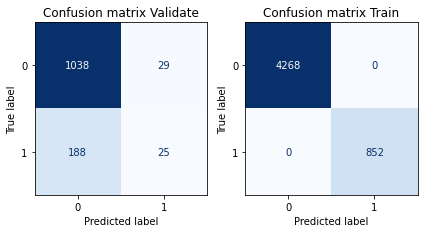

(XGBClassifier(Colsample_bytree=0.86, base_score=0.5, booster='gbtree',
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.11, max_delta_step=0,
               max_depth=157, max_features=6, min_child_weight=0.53,
               min_samples_leaf=6, missing=nan, monotone_constraints='()',
               n_estimators=265, n_jobs=8, num_parallel_tree=1, random_state=8,
               reg_alpha=0.04, reg_lambda=0.92, scale_pos_weight=1,
               subsample=0.97, tree_method='exact', use_label_encoder=False,
               validate_parameters=1, verbosity=0),
 1.0,
 0.6536293675831937)

In [72]:
evm.eval_model(xgb.XGBClassifier(random_state=8, verbosity=0,use_label_encoder=False,Colsample_bytree  =  0.86,   learning_rate  =  0.11,   max_depth  =  157,   max_features  =  6,   min_child_weight  =  0.53,   min_samples_leaf  =  6,   n_estimators  =  265,   reg_alpha  =  0.04,   reg_lambda  =  0.92,   subsample  =  0.97),x_train,y_train,x_val,y_val)